# Analyze OmF mean daily values to identify what's going on before seg fault. 29 October 2023
1. This notebook will read in all ObsFcstAna files for a day and calculate mean values saved in a lists that can be plotted and compared later

In [1]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from my_functions import read_obsfcstana

# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_i = []
obs_fcst_mean_list_i = []
obs_ana_mean_list_i = []
omf_mean_list_i = []
oma_mean_list_i = []
dates_list_i = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20151001', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)

    # Append the mean values to the lists
    obs_obs_mean_list_i.append(obs_obs_mean)
    obs_fcst_mean_list_i.append(obs_fcst_mean)
    obs_ana_mean_list_i.append(obs_ana_mean)
    omf_mean_list_i.append(omf_mean)
    oma_mean_list_i.append(oma_mean)
    
    # Append the current date to the dates list
    dates_list_i.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

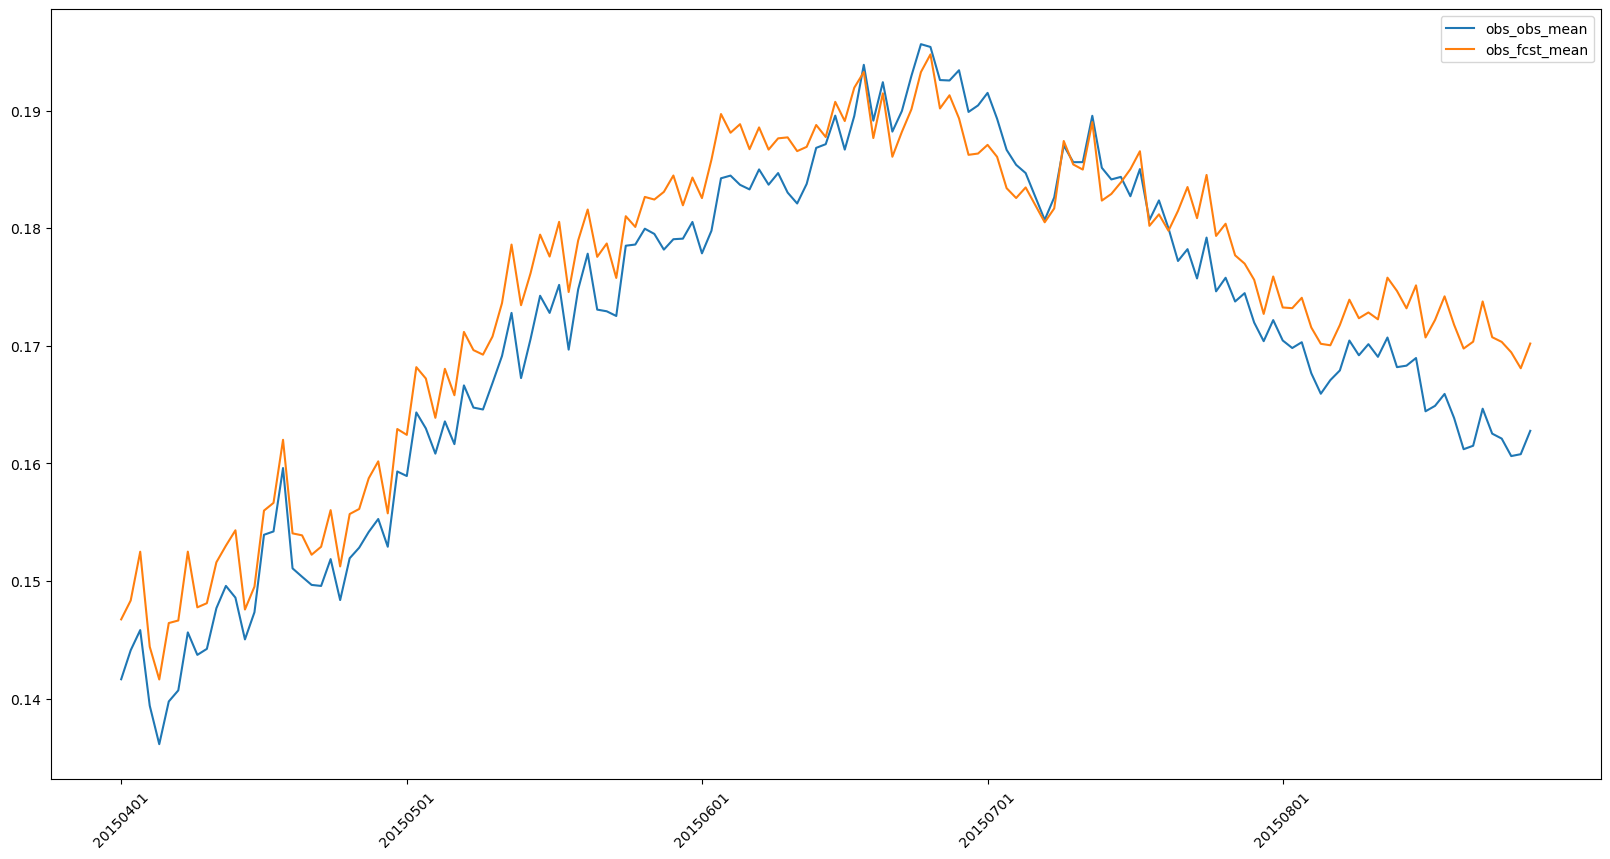

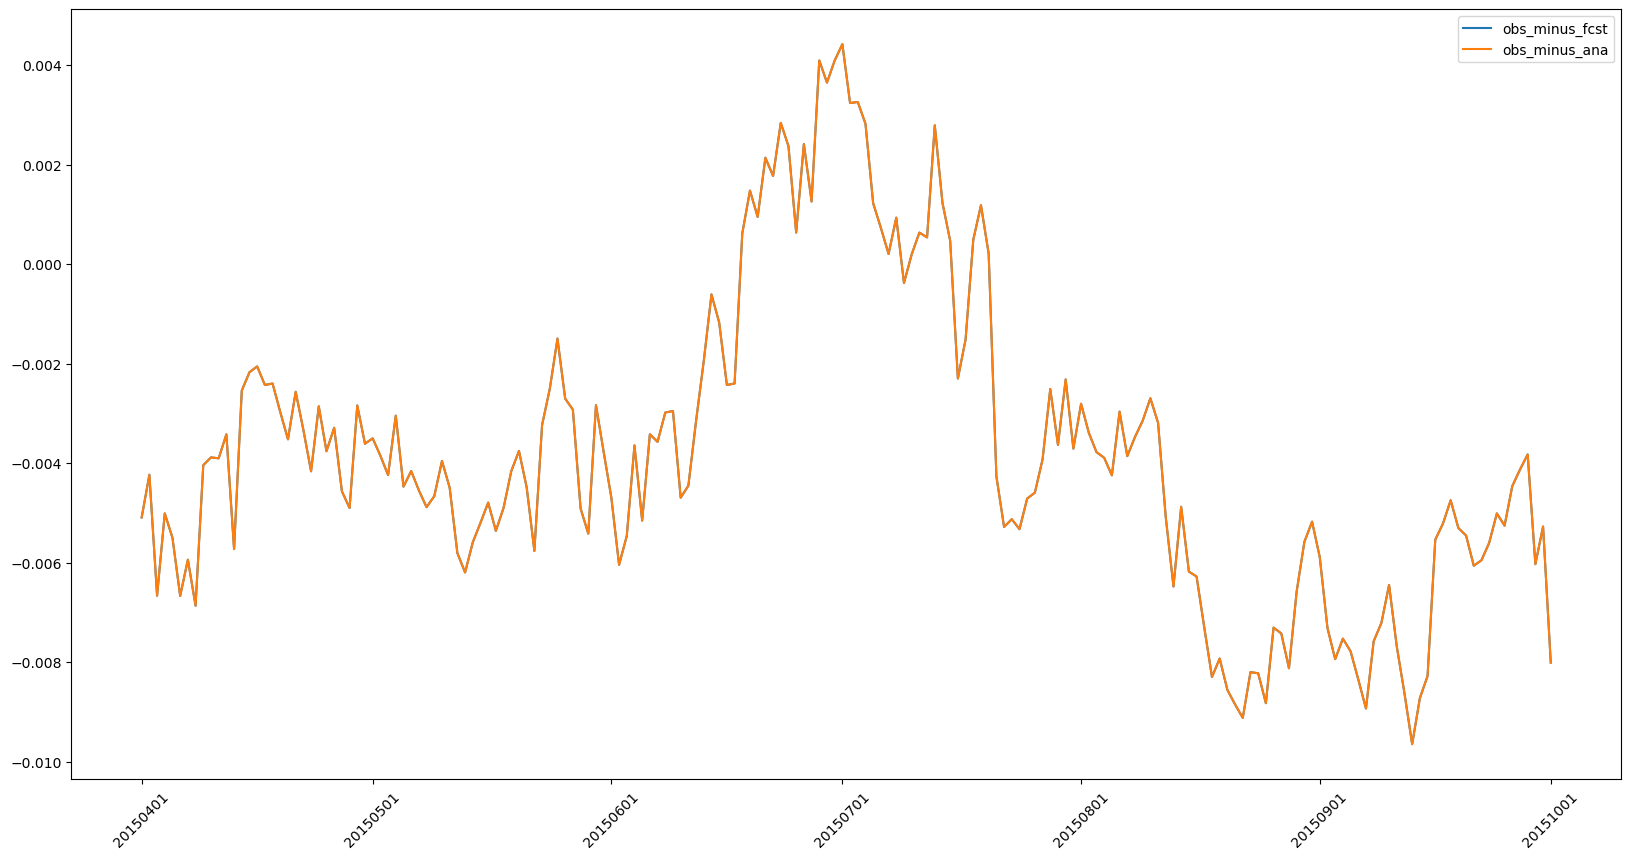

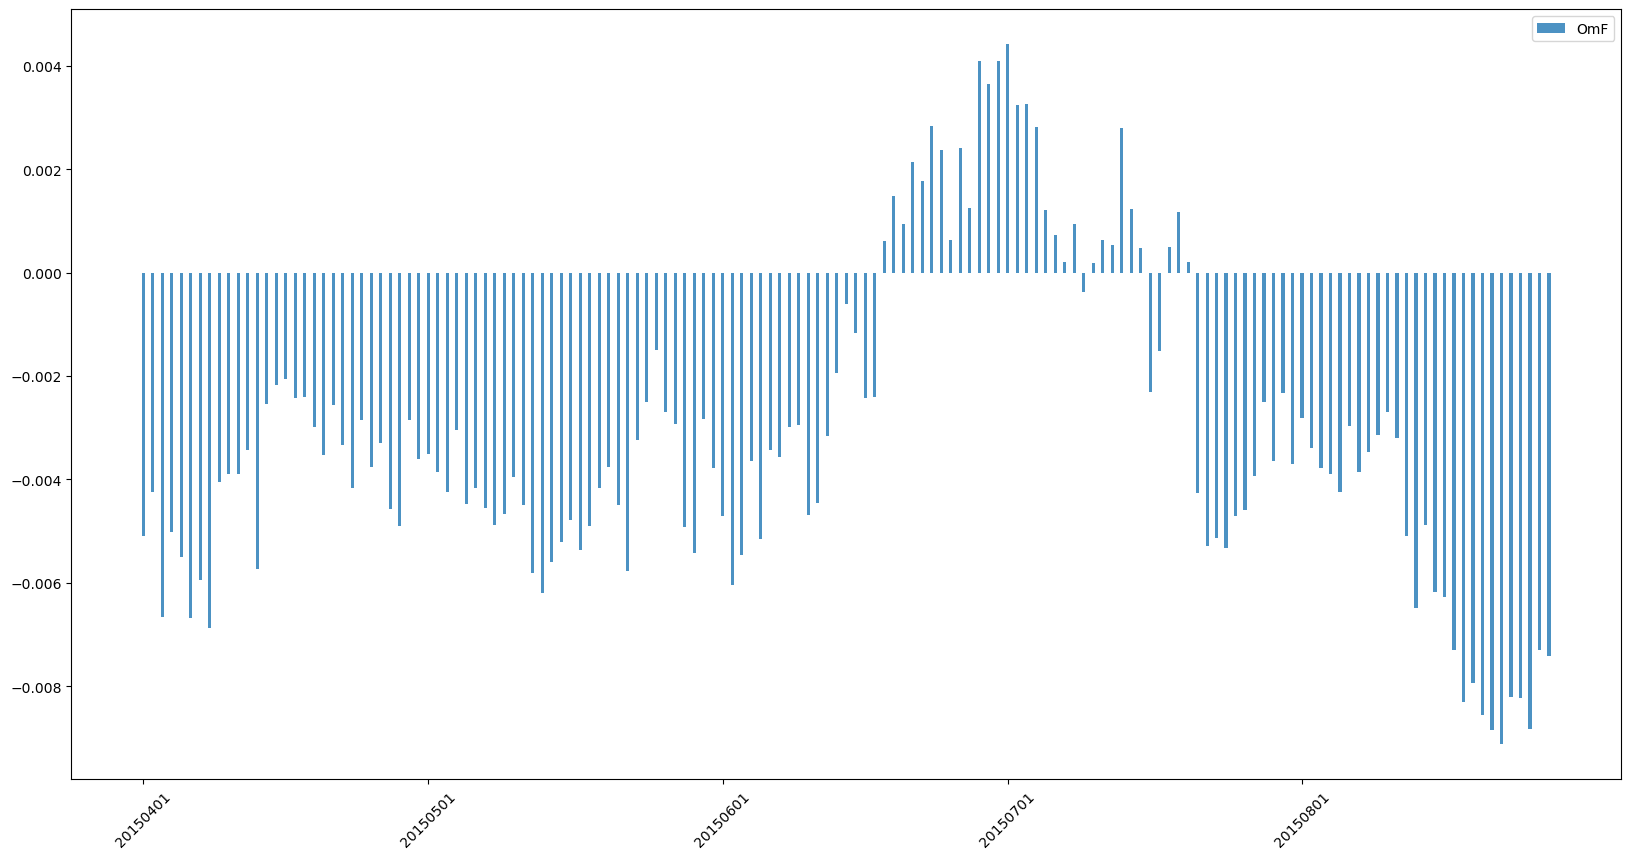

In [2]:
# Create a plot of the mean values
plt.figure(figsize=(20,10))
plt.plot(dates_list_i[:-35], obs_obs_mean_list_i[:-35], label='obs_obs_mean')
plt.plot(dates_list_i[:-35], obs_fcst_mean_list_i[:-35], label='obs_fcst_mean')
# plt.plot(dates_list_i, obs_ana_mean_list_i, label='obs_ana_mean')
plt.legend()

# Set the x-axis tick labels to show every 10 days
xticks = [date for date in dates_list_i[:-35] if date.endswith('01')]
plt.xticks(xticks, rotation=45)

# Save the figure as a PNG file
plt.savefig('innov_obs.png')

plt.show()

# Create a plot of the mean values
plt.figure(figsize=(20,10))
plt.plot(dates_list_i, omf_mean_list_i, label='obs_minus_fcst')
plt.plot(dates_list_i, oma_mean_list_i, label='obs_minus_ana')
plt.legend()

# Set the x-axis tick labels to show every 10 days
xticks = [date for date in dates_list_i if date.endswith('01')]
plt.xticks(xticks, rotation=45)

plt.show()

# Create a bar plot of the mean values
plt.figure(figsize=(20,10))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(dates_list_i[:-35]))
plt.bar(index, omf_mean_list_i[:-35], bar_width, alpha=opacity, label='OmF')
#plt.bar(index, oma_mean_list_i, bar_width, alpha=opacity, label='obs_minus_ana')

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_i[:-35] if date.endswith('01')]
xtick_indices = [dates_list_i.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)
plt.legend()

# Save the figure as a PNG file
plt.savefig('innov_OmF.png')

plt.show()

In [3]:
# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_1Yv2/ASCAT_test_new_scaling_1Yv2/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_test_new_scaling_1Yv2.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_2 = []
obs_fcst_mean_list_2 = []
obs_ana_mean_list_2 = []
omf_mean_list_2 = []
oma_mean_list_2 = []
dates_list_2 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20151001', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)

    # Append the mean values to the lists
    obs_obs_mean_list_2.append(obs_obs_mean)
    obs_fcst_mean_list_2.append(obs_fcst_mean)
    obs_ana_mean_list_2.append(obs_ana_mean)
    omf_mean_list_2.append(omf_mean)
    oma_mean_list_2.append(oma_mean)
    
    # Append the current date to the dates list
    dates_list_2.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_1Yv3/ASCAT_test_new_scaling_1Yv3/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_test_new_scaling_1Yv3.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_3 = []
obs_fcst_mean_list_3 = []
obs_ana_mean_list_3 = []
omf_mean_list_3 = []
oma_mean_list_3 = []
dates_list_3 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20151001', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)

    # Append the mean values to the lists
    obs_obs_mean_list_3.append(obs_obs_mean)
    obs_fcst_mean_list_3.append(obs_fcst_mean)
    obs_ana_mean_list_3.append(obs_ana_mean)
    omf_mean_list_3.append(omf_mean)
    oma_mean_list_3.append(oma_mean)
    
    # Append the current date to the dates list
    dates_list_3.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

In [5]:
## ASCAT_test_new_scaling_1Yv4

# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_1Yv4/ASCAT_test_new_scaling_1Yv4/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_test_new_scaling_1Yv4.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_4 = []
obs_fcst_mean_list_4 = []
obs_ana_mean_list_4 = []
omf_mean_list_4 = []
oma_mean_list_4 = []
dates_list_4 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20151001', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)

    # Append the mean values to the lists
    obs_obs_mean_list_4.append(obs_obs_mean)
    obs_fcst_mean_list_4.append(obs_fcst_mean)
    obs_ana_mean_list_4.append(obs_ana_mean)
    omf_mean_list_4.append(omf_mean)
    oma_mean_list_4.append(oma_mean)
    
    # Append the current date to the dates list
    dates_list_4.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

In [6]:
# ASCAT_test_new_scaling_1Yv5

# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_1Yv5/ASCAT_test_new_scaling_1Yv5/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_test_new_scaling_1Yv5.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_5 = []
obs_fcst_mean_list_5 = []
obs_ana_mean_list_5 = []
omf_mean_list_5 = []
oma_mean_list_5 = []
dates_list_5 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20151001', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)

    # Append the mean values to the lists
    obs_obs_mean_list_5.append(obs_obs_mean)
    obs_fcst_mean_list_5.append(obs_fcst_mean)
    obs_ana_mean_list_5.append(obs_ana_mean)
    omf_mean_list_5.append(omf_mean)
    oma_mean_list_5.append(oma_mean)
    
    # Append the current date to the dates list
    dates_list_5.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)


In [7]:
# ASCAT_test_new_scaling_1Yv6

# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_1Yv6/ASCAT_test_new_scaling_1Yv6/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_test_new_scaling_1Yv6.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_6 = []
obs_fcst_mean_list_6 = []
obs_ana_mean_list_6 = []
omf_mean_list_6 = []
oma_mean_list_6 = []
dates_list_6 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20151001', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)

    # Append the mean values to the lists
    obs_obs_mean_list_6.append(obs_obs_mean)
    obs_fcst_mean_list_6.append(obs_fcst_mean)
    obs_ana_mean_list_6.append(obs_ana_mean)
    omf_mean_list_6.append(omf_mean)
    oma_mean_list_6.append(oma_mean)
    
    # Append the current date to the dates list
    dates_list_6.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

In [8]:
# ASCAT_test_new_scaling_1Yv7

# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_1Yv7/ASCAT_test_new_scaling_1Yv7/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_test_new_scaling_1Yv7.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_7 = []
obs_fcst_mean_list_7 = []
obs_ana_mean_list_7 = []
omf_mean_list_7 = []
oma_mean_list_7 = []
dates_list_7 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20151001', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)

    # Append the mean values to the lists
    obs_obs_mean_list_7.append(obs_obs_mean)
    obs_fcst_mean_list_7.append(obs_fcst_mean)
    obs_ana_mean_list_7.append(obs_ana_mean)
    omf_mean_list_7.append(omf_mean)
    oma_mean_list_7.append(oma_mean)
    
    # Append the current date to the dates list
    dates_list_7.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

In [10]:
# ASCAT_test_new_scaling_1Yv8

# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_1Yv8/ASCAT_test_new_scaling_1Yv6/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_test_new_scaling_1Yv6.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_8 = []
obs_fcst_mean_list_8 = []
obs_ana_mean_list_8 = []
omf_mean_list_8 = []
oma_mean_list_8 = []
dates_list_8 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20151001', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)

    # Append the mean values to the lists
    obs_obs_mean_list_8.append(obs_obs_mean)
    obs_fcst_mean_list_8.append(obs_fcst_mean)
    obs_ana_mean_list_8.append(obs_ana_mean)
    omf_mean_list_8.append(omf_mean)
    oma_mean_list_8.append(oma_mean)
    
    # Append the current date to the dates list
    dates_list_8.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
# ASCAT_test_new_scaling_1Yv9

# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/ASCAT_test_new_scaling_1Yv9/ASCAT_test_new_scaling_1Yv9/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'ASCAT_test_new_scaling_1Yv9.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_9 = []
obs_fcst_mean_list_9 = []
obs_ana_mean_list_9 = []
omf_mean_list_9 = []
oma_mean_list_9 = []
dates_list_9 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20151001', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)

    # Append the mean values to the lists
    obs_obs_mean_list_9.append(obs_obs_mean)
    obs_fcst_mean_list_9.append(obs_fcst_mean)
    obs_ana_mean_list_9.append(obs_ana_mean)
    omf_mean_list_9.append(omf_mean)
    oma_mean_list_9.append(oma_mean)
    
    # Append the current date to the dates list
    dates_list_9.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

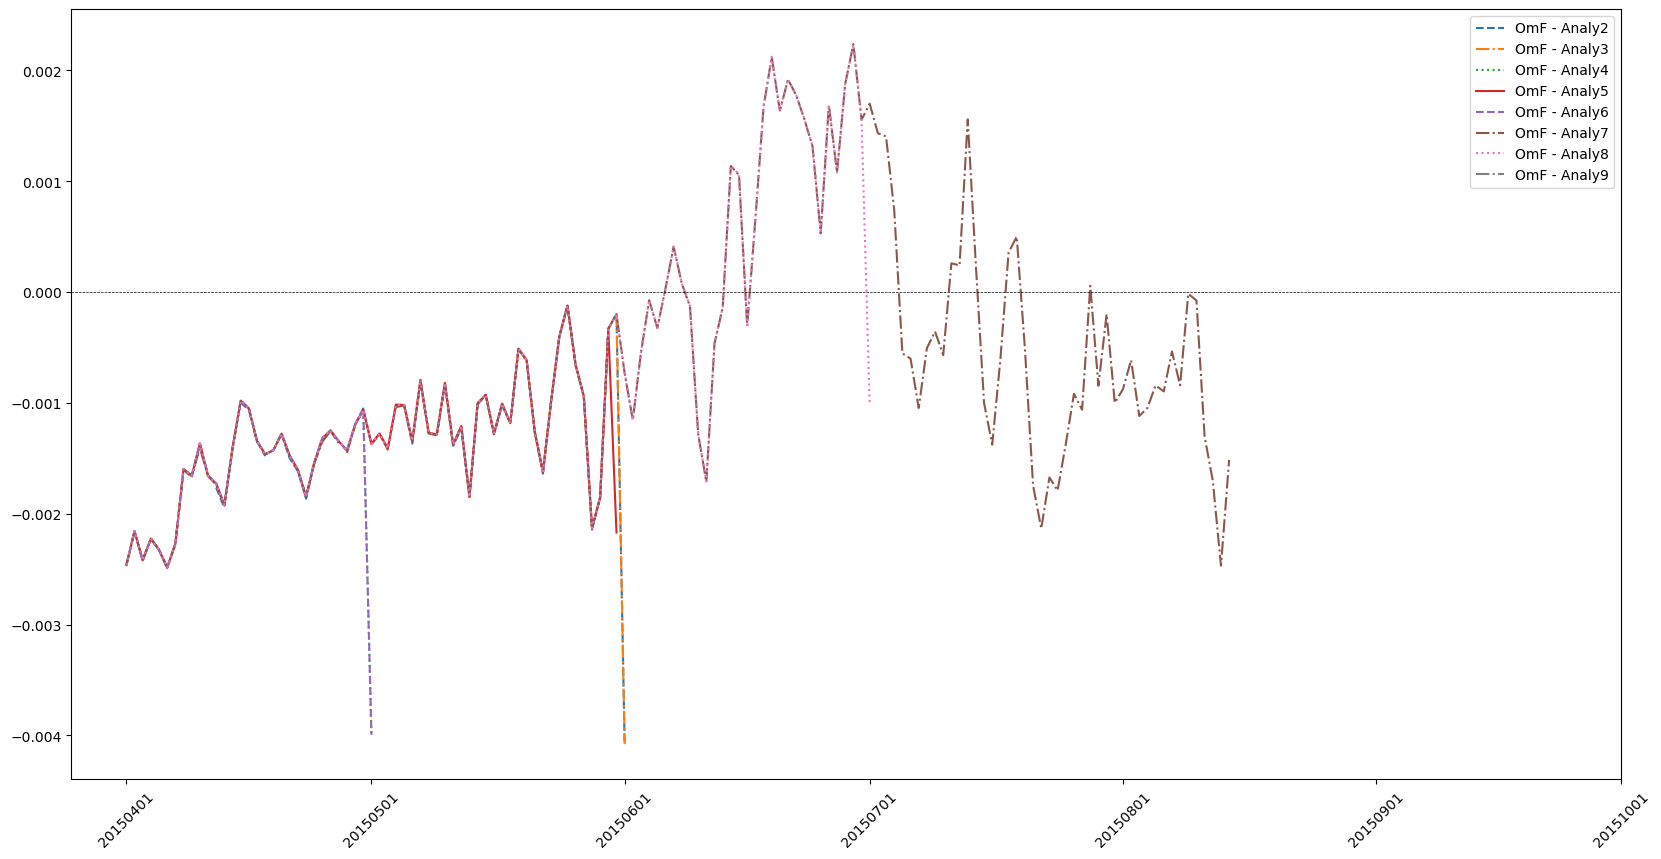

In [17]:
# Create a plot of the mean values
plt.figure(figsize=(20,10))
#plt.plot(dates_list_i, omf_mean_list_i, label='OmF - Innov', linestyle='-')
plt.plot(dates_list_2, oma_mean_list_2, label='OmF - Analy2', linestyle='--')
plt.plot(dates_list_3, oma_mean_list_3, label='OmF - Analy3', linestyle='-.')
plt.plot(dates_list_4, oma_mean_list_4, label='OmF - Analy4', linestyle=':')
plt.plot(dates_list_5, oma_mean_list_5, label='OmF - Analy5', linestyle='-')
plt.plot(dates_list_6, oma_mean_list_6, label='OmF - Analy6', linestyle='--')
plt.plot(dates_list_7, oma_mean_list_7, label='OmF - Analy7', linestyle='-.')
plt.plot(dates_list_8, oma_mean_list_8, label='OmF - Analy8', linestyle=':')
plt.plot(dates_list_9, oma_mean_list_9, label='OmF - Analy9', linestyle='-.')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0
plt.legend()

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_i if date.endswith('01')]
xtick_indices = [dates_list_i.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Save the figure as a PNG file
plt.savefig('multiple_OmF_ts.png')

plt.show()

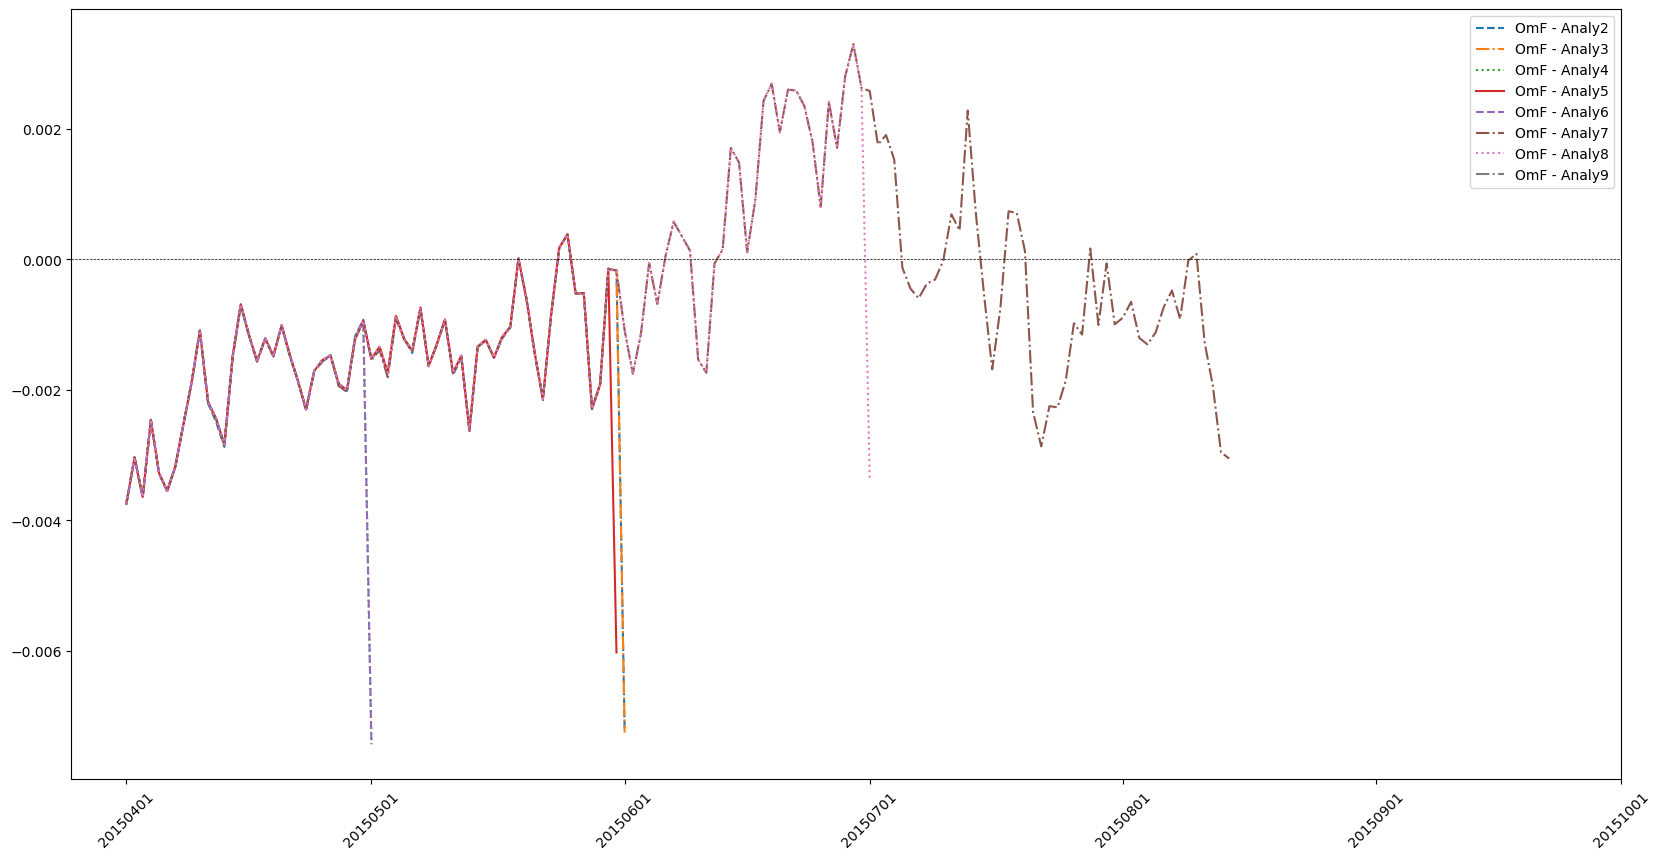

In [18]:
# Create a plot of the mean values
plt.figure(figsize=(20,10))
#plt.plot(dates_list_i, omf_mean_list_i, label='OmF - Innov', linestyle='-')
plt.plot(dates_list_2, omf_mean_list_2, label='OmF - Analy2', linestyle='--')
plt.plot(dates_list_3, omf_mean_list_3, label='OmF - Analy3', linestyle='-.')
plt.plot(dates_list_4, omf_mean_list_4, label='OmF - Analy4', linestyle=':')
plt.plot(dates_list_5, omf_mean_list_5, label='OmF - Analy5', linestyle='-')
plt.plot(dates_list_6, omf_mean_list_6, label='OmF - Analy6', linestyle='--')
plt.plot(dates_list_7, omf_mean_list_7, label='OmF - Analy7', linestyle='-.')
plt.plot(dates_list_8, omf_mean_list_8, label='OmF - Analy8', linestyle=':')
plt.plot(dates_list_9, omf_mean_list_9, label='OmF - Analy9', linestyle='-.')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0
plt.legend()

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_i if date.endswith('01')]
xtick_indices = [dates_list_i.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Save the figure as a PNG file
plt.savefig('multiple_OmF_ts.png')

plt.show()